## Correlate Spec Params & ERP measures

### Merge exp results with param results

In [4]:
# Define paths
REPO_PATH = r"C:\Users\micha\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'

# Dataset details
FS = 500 # sampling frequency
SESSIONS = ['L_SNR_250717', 'A_SNR_140819', 'A_SNR_041018'] # List of sessions to analyze

In [5]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [6]:
# load dfs
erp_params_df = pd.read_csv(r'G:\Shared drives\v1_v4_1024\data\results\max_erp_params_df.csv', index_col=0)
spec_params_df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [7]:
spec_params_df

,session,channel,chan_idx,array,epoch,exp,r2
0,A_SNR_041018,0,0,1,pre,3.486568,0.998865
1,A_SNR_041018,1,1,1,pre,3.412634,0.996765
2,A_SNR_041018,2,2,1,pre,3.178614,0.996802
3,A_SNR_041018,3,3,1,pre,3.391134,0.998620
4,A_SNR_041018,4,4,1,pre,3.258810,0.997916
...,...,...,...,...,...,...,...
6139,L_SNR_250717,59,1019,16,post,2.765816,0.998221
6140,L_SNR_250717,60,1020,16,post,2.800549,0.999511
6141,L_SNR_250717,61,1021,16,post,2.944253,0.999020
6142,L_SNR_250717,62,1022,16,post,3.043717,0.998485


## ! Issue !
What's going on here? erp_params_df only has 16 rows per session

In [8]:
erp_params_df = erp_params_df.drop(["session.1","channel.1","array.1"], axis=1)
erp_params_df

,array,channel,latency,amp,widths
session,,,,,
A_SNR_041018,1,63,344,207.695669,77.848176
A_SNR_041018,2,63,301,127.409079,60.684358
A_SNR_041018,3,63,273,26.154229,23.922115
A_SNR_041018,4,63,344,28.349222,24.407633
A_SNR_041018,5,63,344,37.763165,49.342099
A_SNR_041018,6,63,336,75.558723,65.863580
A_SNR_041018,7,63,341,57.131381,46.630808
A_SNR_041018,8,63,344,74.267697,134.680387
A_SNR_041018,9,63,310,57.846099,28.524700


In [9]:
# Instead, below we will compute the change in expoent
# spec_params_df = spec_params_df.loc[spec_params_df["epoch"]=="post"]
# spec_params_df


,session,channel,chan_idx,array,exp_post,r2_post,exp_pre,r2_pre,exp_diff
0,A_SNR_041018,0,0,1,2.943896,0.998326,3.486568,0.998865,-0.542673
1,A_SNR_041018,1,1,1,3.199538,0.996887,3.412634,0.996765,-0.213095
2,A_SNR_041018,2,2,1,3.137555,0.997652,3.178614,0.996802,-0.041059
3,A_SNR_041018,3,3,1,3.330809,0.996622,3.391134,0.998620,-0.060325
4,A_SNR_041018,4,4,1,3.319576,0.998047,3.258810,0.997916,0.060765
...,...,...,...,...,...,...,...,...,...
3067,L_SNR_250717,59,1019,16,2.765816,0.998221,2.804417,0.995542,-0.038601
3068,L_SNR_250717,60,1020,16,2.800549,0.999511,2.610531,0.996774,0.190018
3069,L_SNR_250717,61,1021,16,2.944253,0.999020,3.011786,0.996864,-0.067533
3070,L_SNR_250717,62,1022,16,3.043717,0.998485,3.075089,0.997915,-0.031372


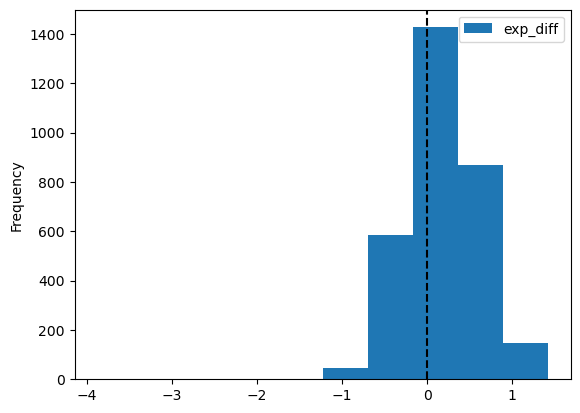

In [10]:
# compute stimulus-evoked change in exponent
df_post = spec_params_df.loc[spec_params_df["epoch"]=="post"]
df_pre = spec_params_df.loc[spec_params_df["epoch"]=="pre"]
df_merge = df_post.merge(df_pre, on=['session','channel','chan_idx','array'], suffixes=['_post', '_pre'])
df_params = df_merge.drop(columns=['epoch_pre','epoch_post'])
df_params['exp_diff'] = df_params['exp_post'] - df_params['exp_pre']

# plot
df_params.plot(y='exp_diff', kind='hist')
ax = plt.gca()
ax.axvline(0, color='k', linestyle='--')

# show df
df_params


In [11]:
# merge dataframes
results_df = pd.merge(left=erp_params_df, right=spec_params_df, on= ["session", "array", "channel"])
results_df.to_csv(r'G:\Shared drives\v1_v4_1024\data\results\spec_erp_results.csv')

In [12]:
results_df

,session,array,channel,latency,amp,widths,chan_idx,epoch,exp,r2
0,A_SNR_041018,1,63,344,207.695669,77.848176,63,pre,3.402816,0.998911
1,A_SNR_041018,1,63,344,207.695669,77.848176,63,post,3.409354,0.998879
2,A_SNR_041018,2,63,301,127.409079,60.684358,127,pre,3.539154,0.999047
3,A_SNR_041018,2,63,301,127.409079,60.684358,127,post,3.063882,0.995620
4,A_SNR_041018,3,63,273,26.154229,23.922115,191,pre,2.227790,0.998397
...,...,...,...,...,...,...,...,...,...,...
91,L_SNR_250717,14,63,338,112.575295,23.443686,895,post,2.426764,0.997711
92,L_SNR_250717,15,63,340,111.971582,24.728137,959,pre,2.487261,0.995936
93,L_SNR_250717,15,63,340,111.971582,24.728137,959,post,3.451370,0.995048
94,L_SNR_250717,16,63,241,80.959982,28.506139,1023,pre,2.980375,0.998137


### plot exp and amp

exp = y
amp = x
scatterplot
color by session

In [13]:
results_df

,session,array,channel,latency,amp,widths,chan_idx,epoch,exp,r2
0,A_SNR_041018,1,63,344,207.695669,77.848176,63,pre,3.402816,0.998911
1,A_SNR_041018,1,63,344,207.695669,77.848176,63,post,3.409354,0.998879
2,A_SNR_041018,2,63,301,127.409079,60.684358,127,pre,3.539154,0.999047
3,A_SNR_041018,2,63,301,127.409079,60.684358,127,post,3.063882,0.995620
4,A_SNR_041018,3,63,273,26.154229,23.922115,191,pre,2.227790,0.998397
...,...,...,...,...,...,...,...,...,...,...
91,L_SNR_250717,14,63,338,112.575295,23.443686,895,post,2.426764,0.997711
92,L_SNR_250717,15,63,340,111.971582,24.728137,959,pre,2.487261,0.995936
93,L_SNR_250717,15,63,340,111.971582,24.728137,959,post,3.451370,0.995048
94,L_SNR_250717,16,63,241,80.959982,28.506139,1023,pre,2.980375,0.998137


<AxesSubplot:xlabel='amp', ylabel='exp'>

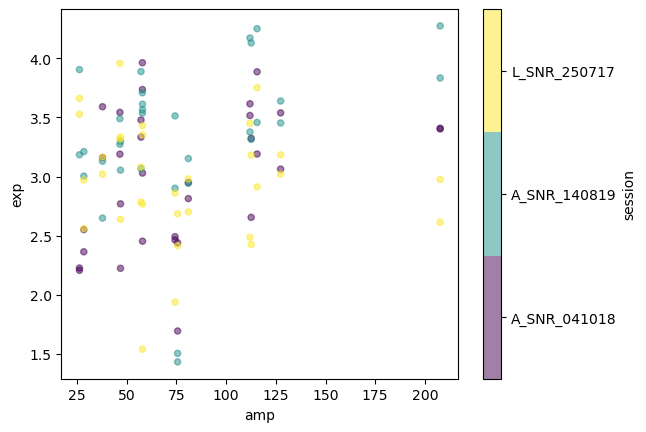

In [15]:
# changed from amp_abs to amp from this point on
results_df['session'] = pd.Categorical(results_df['session'])
results_df.plot.scatter(x="amp", y="exp", c="session", cmap="viridis", alpha=0.5)

(array([12.,  0.,  0.,  6.,  6.,  6.,  6.,  0.,  6., 54.]),
 array([182. , 202.6, 223.2, 243.8, 264.4, 285. , 305.6, 326.2, 346.8,
        367.4, 388. ]),
 <BarContainer object of 10 artists>)

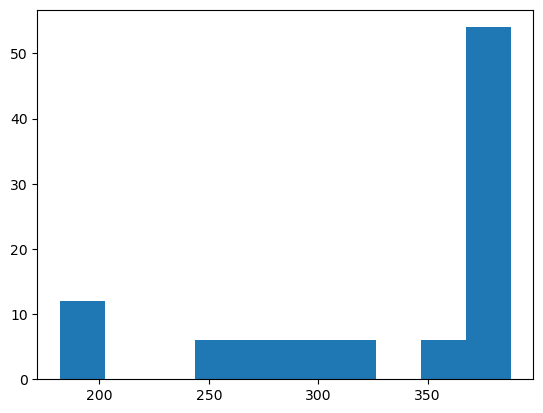

In [16]:
time = np.arange(-0.3, 0.7, 1/FS) * 1000
plt.hist(time[results_df['latency']])

### linear regression 


linear regression for each session
run what's needed for additional session to continue with 3

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_df["amp"], y=results_df["exp"])

In [20]:
y_pred = intercept + slope*results_df["amp"]

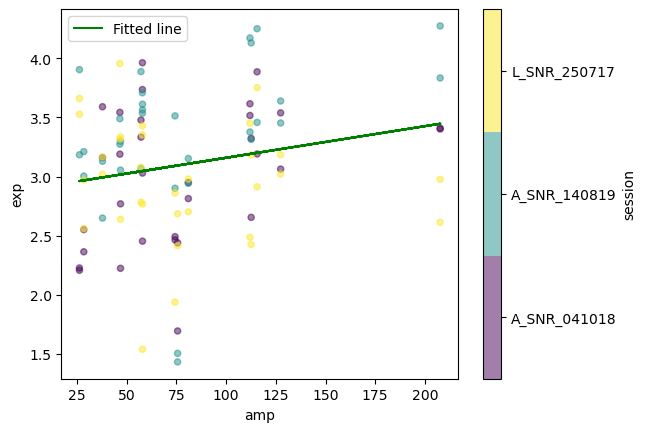

In [22]:
results_df.plot.scatter(x="amp", y="exp", c="session", cmap="viridis", alpha=0.5)
plt.plot(results_df["amp"],y_pred, color="green", label="Fitted line")
plt.legend()
plt.show()

In [23]:
colors = np.array(["red", "green"])

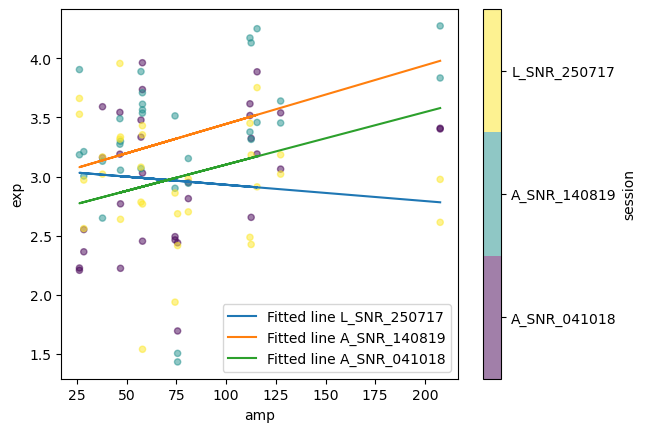

In [25]:
# create linear regression by session
ax = results_df.plot.scatter(x="amp", y="exp", c="session", cmap="viridis", alpha=0.5)
for session in SESSIONS: 
    results_session = results_df.loc[results_df["session"]==session]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp"], y=results_session["exp"])
    y_pred = intercept + slope*results_session["amp"]

    plt.plot(results_session["amp"],y_pred, label=f"Fitted line {session}")
plt.legend()
plt.show()

#ax.figure.savefig(r"G:\Shared drives\v1_v4_1024\figures\linregress_exp_ampabs.png")


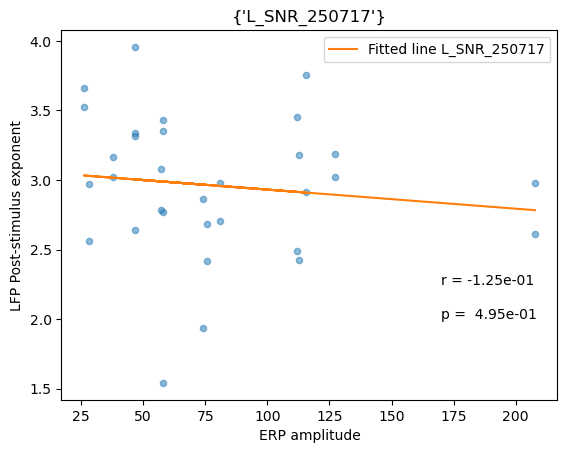

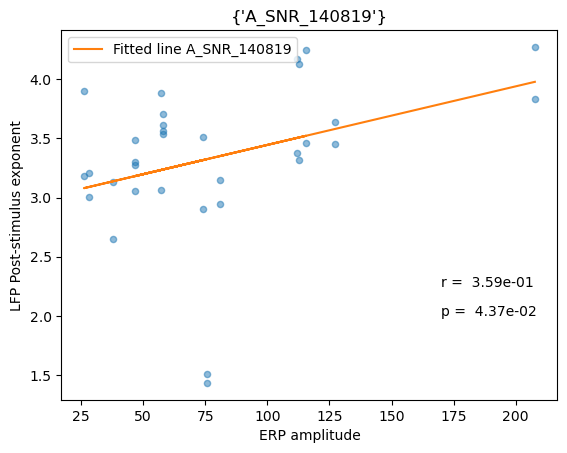

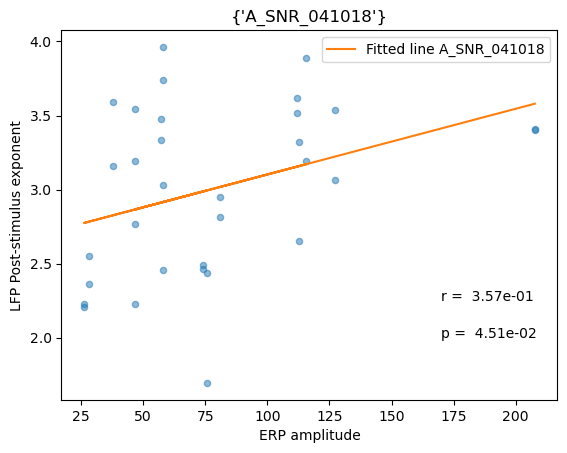

In [28]:
for session in SESSIONS:
    results_session = results_df.loc[results_df["session"]==session]

    ax = results_session.plot.scatter(x="amp", y="exp", alpha=0.5)
    plt.ylabel("LFP Post-stimulus exponent")
    plt.xlabel("ERP amplitude")
    plt.title({session})
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp"], y=results_session["exp"])
    y_pred = intercept + slope*results_session["amp"]

    plt.plot(results_session["amp"],y_pred, label=f"Fitted line {session}", color="C1")

    plt.text(170, 2.25, f'r = {rvalue: .2e}')
    plt.text(170, 2, f'p = {pvalue: .2e}')
    plt.legend()
    plt.show()

    ax.figure.savefig(fr"G:\Shared drives\v1_v4_1024\figures\linregress_{session}.png")